**Import required packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read the data**

In [2]:
visa_df=pd.read_csv("Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


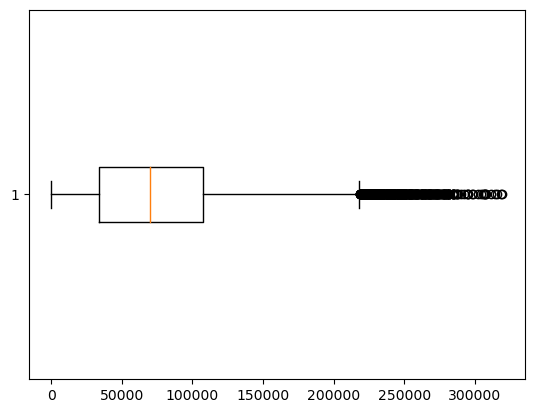

In [5]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

# Orange line : Median value = 50P data
# Black dots : All are outliers

In [ ]:
          Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR

**Procedure to find the Outliers**

$Step-1$:
    
   - Calculate Q1 , Q2 and Q3

$Step-2$:
    
   - Calculate IQR = (Q3-Q1)
    
$Step-3$:
    
   - Calculate UB = Q3 + 1.5*IQR
   - Calculate LB = Q1 - 1.5*IQR
    
$Step-4$:
    
   - Find the outliers which are having greater than UB
    
   - Find the outliers which are having less than LB

In [6]:
Q1=np.quantile(visa_df['prevailing_wage'],0.25)
Q2=np.quantile(visa_df['prevailing_wage'],0.50)
Q3=np.quantile(visa_df['prevailing_wage'],0.75)
IQR=Q3-Q1
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR
UB,LB

(218315.56125000003, -76564.56875000002)

In [7]:
con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
outliers_df=visa_df[con1|con2]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [4]:
def outliers(col):
    Q1=np.quantile(visa_df[col],0.25)
    Q2=np.quantile(visa_df[col],0.50)
    Q3=np.quantile(visa_df[col],0.75)
    IQR=Q3-Q1
    UB=Q3+1.5*IQR
    LB=Q1-1.5*IQR
    con1=visa_df[col]>UB
    con2=visa_df[col]<LB
    outliers_df=visa_df[con1|con2]
    print(f"{col} has {len(outliers_df)} outliers")

num_col=visa_df.select_dtypes(exclude='object').columns
for col in num_col:
    outliers(col)

no_of_employees has 1556 outliers
yr_of_estab has 3260 outliers
prevailing_wage has 427 outliers


In [12]:
Q1=np.quantile(visa_df['prevailing_wage'],0.25)
Q2=np.quantile(visa_df['prevailing_wage'],0.50)
Q3=np.quantile(visa_df['prevailing_wage'],0.75)
IQR=Q3-Q1
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR
con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
outliers_df=visa_df[con1|con2]
con11=visa_df['prevailing_wage']<UB
con22=visa_df['prevailing_wage']>LB
non_outliers_df=visa_df[con11&con22]

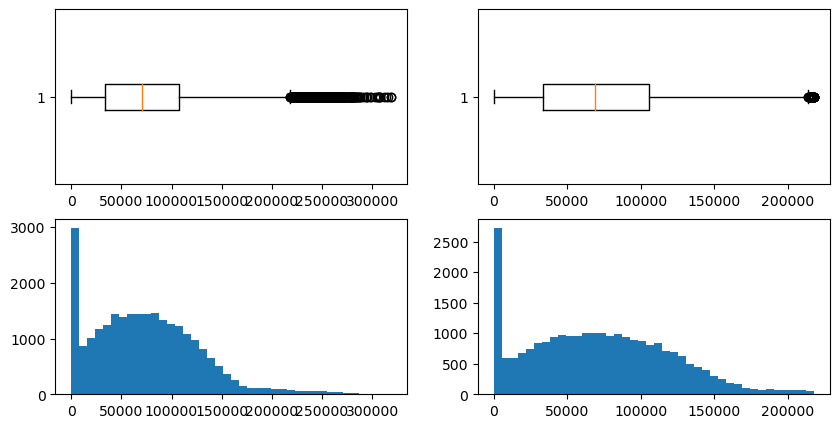

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.subplot(2,2,2)
plt.boxplot(non_outliers_df['prevailing_wage'],vert=False)
plt.subplot(2,2,3)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4)
plt.hist(non_outliers_df['prevailing_wage'],bins=40)
plt.show()

**How to deal with outliers**

- Drop the outliers based on some percentage

     - if you have very huge data
    
     - and the outliers percentage is <2 , then drop the outliers
        
     - Drop the outliers means , we are removing some rows , all the columns
    
     - In the above examples total count=25480, outliers are = 427 , 427*100/25480 = 1.6
        
     - After removing 427 observations, we have 25053 observation (98% of data)
    
    
- Impute (Fill) the outliers with Median value

     - We already know that outliers doesnot affect Median value
    
     - So if you dont want loss the data , and you want fill the outliers then use Median
        
- Impute (Fill) with UB and LB values

     - Fill the outliers with UB value, which are having >UB
    
     - Fill the outliers with LB value, which are having <LB

In [11]:
# <median value> of original data frame(visa_df)
outliers_df['prevailing_wage']=visa_df['prevailing_wage'].median()
modified_data=outliers_df
modified_data.head()

C:\Users\ranja\AppData\Local\Temp\ipykernel_47332\57590739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['prevailing_wage']=visa_df['prevailing_wage'].median()


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,70308.21,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,70308.21,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,70308.21,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,70308.21,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,70308.21,Year,Y,Certified


In [13]:
# now we have non_outliers_df and modified_data
# we need to merge, combine, concatenate
# outer join = A U B ,  A or B
# Inner join = A Intersection B  , A and B
final_df=pd.merge(non_outliers_df,modified_data,how="outer")
final_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,70308.2100,Year,Y,Denied
25476,EZYV25196,North America,Master's,Y,N,47,2001,South,70308.2100,Year,N,Certified
25477,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,70308.2100,Year,N,Certified
25478,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,70308.2100,Year,N,Certified


In [15]:
final_df1=pd.concat([non_outliers_df,modified_data])
final_df1

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,70308.2100,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,70308.2100,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,70308.2100,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,70308.2100,Year,N,Certified


**np.where**

- np.where is used to fill the values based on True condition

- np.where will take 3 arguments

     - Condition
     
     - Value you want to replace, If that condition is true
     
     - Value you want to replace, If the condition is false
     
- np.where(condition,true value,false value)
     

In [16]:
d1=pd.DataFrame()
d1['Name']=['Ramesh','Suresh','Sathish']
d1['Age']=[24,30,32]
d1

,Name,Age
0,Ramesh,24
1,Suresh,30
2,Sathish,32


In [17]:
d1=pd.DataFrame()
d1['Name']=['Ramesh','Suresh','Sathish']
d1['Age']=[24,30,32]
con=d1['Age']>25
d1['Age']=np.where(con,300,d1['Age'])
d1

,Name,Age
0,Ramesh,24
1,Suresh,300
2,Sathish,300


In [ ]:
np.where(<condition>,<True value>,<False value>)

{'whiskers': [<matplotlib.lines.Line2D at 0x26aefe61dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x26aefe63890>,
 'boxes': [<matplotlib.lines.Line2D at 0x26aefe60f90>],
 'medians': [<matplotlib.lines.Line2D at 0x26aefeb4cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26aeee91650>],
 'means': []}

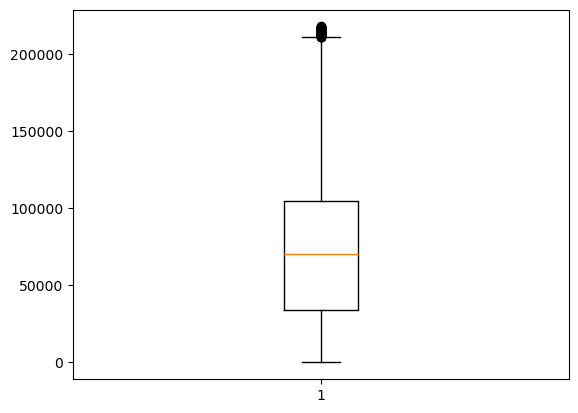

In [18]:
Q1=np.quantile(visa_df['prevailing_wage'],0.25)
Q2=np.quantile(visa_df['prevailing_wage'],0.50)
Q3=np.quantile(visa_df['prevailing_wage'],0.75)
IQR=Q3-Q1
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR

con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
con=con1|con2

med=visa_df['prevailing_wage'].median()
visa_df['prevailing_wage']=np.where(con,med,visa_df['prevailing_wage'])
plt.boxplot(visa_df['prevailing_wage'])